# Comparison between 3D & 2.5D simulation

# Project: Fractured medium

# Core Sample: Artificial (thin box, eggshell and periodic with slope)

# Author: Monique Dali @mfdali @lmmp-puc-rio

## Libraries

In [1]:
# Load libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Check path

In [2]:
if "src" in os.getcwd():
    os.chdir('..')

In [3]:
os.getcwd()

'/home/monique/artificial-fracture-3D'

## Functions

In [4]:
def manipulate_df(df_original,casename,df_to_compare):
    df_copy = _calculate_difference(df_original)
    df_3D_filter = df_copy[["case","mesh","dofs","avg_ah","inflow","outflow","deviation","exec_time","k_eq","k_f","k_f_dev"]].head(1)
    df_2D_filter = df_to_compare[df_to_compare['mesh']==casename].head(1)
    df_comparison = pd.concat([df_3D_filter,df_2D_filter],axis=0,ignore_index=True)
    df_comparison['3d_2d_dev'] = (abs(df_comparison['k_eq'][0]-df_comparison['k_eq'][1])/df_comparison['k_eq'][0])*100
    return df_comparison

In [5]:
#Load data
def load_data(filename):
    # Read file
    df = pd.read_csv(filename,header=0,sep=',')
    return df

In [6]:
def _calculate_difference(df):
    # Copy original dataframe
    df1 = df.copy()
    # Label the simulated scenarios
    df1['k_f_dev'] = (abs(df1['k_f']-df1['k_eq'])/df1['k_f'])*100
    # Ascending order of degrees of freedom
    df1.sort_values(by=['k_f_dev'],inplace=True)
    #Update index
    df1 = df1.reset_index(drop=True)
    return df1

## Load Data

In [7]:
# File with mesh test information
folder = "data/"
# 2.5D file
twoD_filename = folder + "results_2.5D_meshes.txt"
# 3D files
box_filename = folder +"results_3d_meshes-box.txt"
eggshell_filename = folder +"results_3d_meshes-eggshell.txt"
slope_filename = folder +"results_3d_meshes-slope.txt"

In [8]:
df_2D = load_data(twoD_filename)
df_box_3D = load_data(box_filename)
df_eggshell_3D = load_data(eggshell_filename)
df_slope_3D = load_data(slope_filename)

### Manipulate 2D dataframe

In [9]:
# Visualize dataframe
df_2D#.head()

,Case,Equation,Av_Height,np.min,np.max,Inflow,Outflow,%Deviation,K_eq,Exec_time,Area,Height_3,Av_lub,cells,dof,time
0,3d-artificial-fracture2.5D-slope-10N,3d-artificial-fracture2.5D-slope-10N,0.001499,0.000900,0.002100,0.004451,0.004451,-8.396069e-11,1.589800e-07,31.5172,0.001,382199.0,0.001378,40000,181503,31.5172
1,3d-artificial-fracture2.5D-slope-10N,3d-artificial-fracture2.5D-slope-10N,0.001500,0.000900,0.002100,0.004451,0.004451,-8.525058e-11,1.589730e-07,34.2675,0.001,382449.0,0.001378,40602,184222,34.2675
2,3d-artificial-fracture2.5D-slope-9N,3d-artificial-fracture2.5D-slope-9N,0.001500,0.000900,0.002100,0.004448,0.004448,-8.431573e-11,1.588620e-07,29.5314,0.001,381022.0,0.001379,40602,184222,29.5314
3,3d-artificial-fracture2.5D-slope-9N,3d-artificial-fracture2.5D-slope-9N,0.001500,0.000900,0.002100,0.004447,0.004447,-1.260591e-10,1.588190e-07,96.6377,0.001,381233.0,0.001379,120000,542503,96.6377
4,3d-artificial-fracture2.5D-slope-10N,3d-artificial-fracture2.5D-slope-10N,0.001500,0.000900,0.002100,0.004451,0.004451,-8.525058e-11,1.589730e-07,30.7719,0.001,382449.0,0.001378,40602,184222,30.7719
5,3d-artificial-fracture2.5D-slope-10N,3d-artificial-fracture2.5D-slope-10N,0.001500,0.000901,0.002099,0.004456,0.004456,-8.468948e-11,1.591480e-07,23.9347,0.001,381389.0,0.001379,40602,184222,23.9347
6,3d-artificial-fracture2.5D-box-1mm-0003,3d-artificial-fracture2.5D-box-1mm-0003,0.001000,0.001000,0.001000,0.002883,0.002883,-9.308959e-11,8.236660e-08,24.6628,0.005,5000000.0,0.001000,40602,184222,24.6628
7,3d-artificial-fracture2.5D-box-1mm-0003,3d-artificial-fracture2.5D-box-1mm-0003,0.001000,0.001000,0.001000,0.002883,0.002883,-9.280376e-11,8.236660e-08,30.9266,0.005,5000000.0,0.001000,40602,184222,30.9266
8,3d-artificial-fracture2.5D-box-1mm-0003,3d-artificial-fracture2.5D-box-1mm-0003,0.001000,0.001000,0.001000,0.002883,0.002883,-1.146922e-10,8.236660e-08,10.5340,0.005,5000000.0,0.001000,40602,184222,10.5340
9,3d-artificial-fracture2.5D-box-1mm-0003,3d-artificial-fracture2.5D-box-1mm-0003,0.001000,0.001000,0.001000,0.002883,0.002883,-9.280376e-11,8.236660e-08,30.9179,0.005,5000000.0,0.001000,40602,184222,30.9179


In [10]:
box_casename='3d-artificial-fracture2.5D-box-1mm-0003'
eggshell_casename='3d-artificial-fracture2.5D-eggshell-10N'
slope_casename = '3d-artificial-fracture2.5D-slope-10N'

In [11]:
#Rename axis labels
table_2D = df_2D.rename(columns={"Case":"mesh","dof":"dofs","Av_Height":"avg_ah","Inflow":"inflow","Outflow":"outflow","%Deviation":"deviation","K_eq":"k_eq","Exec_time":"exec_time"})

In [12]:
table_2D['k_f'] = pow(table_2D['avg_ah'],2)/12

In [13]:
table_2D['case'] = "2.5D"

In [14]:
table_2D = _calculate_difference(table_2D)

In [15]:
# Filter columns
table_2D = table_2D[["case","mesh","dofs","avg_ah","inflow","outflow","deviation","exec_time","k_eq","k_f","k_f_dev"]]

### Box

In [16]:
# Visualize dataframe
df_box_3D.head()

,mesh,triangles,dofs,solver,avg_ah,x,y,z,inflow,outflow,deviation,k_eq,k_f,exec_time,Area,ah_lub
0,thin_box_1mm_meshsize_0004,74594,400000.0,minres,0.001,0.05,0.02,0.001,0.000222,0.000222,-0.000010,8.066700e-08,8.333300e-08,365.949,0.001,1000.0
1,thin_box_1mm_meshsize_0003,190389,1000000.0,minres,0.001,0.05,0.02,0.001,0.000223,0.000223,0.000004,8.069100e-08,8.333300e-08,1376.000,0.001,1000.0
2,thin_box_1mm_meshsize_0004,74594,400000.0,minres,0.001,0.05,0.02,0.001,0.000222,0.000222,0.000025,8.066700e-08,8.333300e-08,276.909,0.001,1000.0
3,thin_box_1mm_meshsize_0004,74594,400000.0,minres,0.001,0.05,0.02,0.001,0.000011,0.000011,0.000025,8.066700e-08,8.333300e-08,303.257,0.001,1000.0
4,thin_box_1mm_meshsize_0002,599296,3000000.0,minres,0.001,0.05,0.02,0.001,0.000223,0.000223,-0.000013,8.070300e-08,8.333300e-08,6082.450,0.001,1000.0


In [17]:
df_box_3D['case'] = "3D"

In [18]:
box_comparison = manipulate_df(df_box_3D,box_casename,table_2D)

In [19]:
box_comparison

,case,mesh,dofs,avg_ah,inflow,outflow,deviation,exec_time,k_eq,k_f,k_f_dev,3d_2d_dev
0,3D,thin_box_1mm_meshsize_0004,400000.0,0.001,0.000011,0.000011,1.122848e-01,215.9800,8.264700e-08,8.333300e-08,0.823203,0.339274
1,2.5D,3d-artificial-fracture2.5D-box-1mm-0003,184222.0,0.001,0.002883,0.002883,-9.308959e-11,24.6628,8.236660e-08,8.333333e-08,1.160080,0.339274


### Eggshell

In [20]:
# Visualize dataframe
df_eggshell_3D.head()

,mesh,triangles,dofs,solver,avg_ah,x,y,z,inflow,outflow,deviation,k_eq,k_f,exec_time,Area,ah_lub
0,x2_reducedv2_1mm_meshsize_00035,152018,802687,minres,0.001,0.05,0.02,0.0009,0.000215,0.000215,-0.000014,7.805100e-08,8.333200e-08,741.996,0.001025,999.995
1,x2_reducedv2_1mm_meshsize_00025,379079,1884450,minres,0.001,0.05,0.02,0.0009,0.000215,0.000215,-0.001043,7.799500e-08,8.333700e-08,2612.390,0.001026,1000.022
2,x2_reducedv2_1mm_meshsize_0002,674876,3263219,minres,0.001,0.05,0.02,0.0009,0.000214,0.000214,-0.000379,7.795500e-08,8.333500e-08,5278.530,0.001026,1000.011
3,x2_reducedv3_1mm_meshsize_0004,62305,351545,minres,0.001,0.05,0.02,0.0009,0.000215,0.000215,0.000206,7.819800e-08,8.333500e-08,212.504,0.001024,1000.012
4,x2_reducedv3_1mm_meshsize_00035,80426,451162,minres,0.001,0.05,0.02,0.0009,0.000215,0.000215,0.000122,7.809300e-08,8.334000e-08,295.423,0.001024,1000.039


In [21]:
df_eggshell_3D['case'] = "3D"

In [22]:
eggshell_comparison = manipulate_df(df_eggshell_3D,eggshell_casename,table_2D)

In [23]:
eggshell_comparison

,case,mesh,dofs,avg_ah,inflow,outflow,deviation,exec_time,k_eq,k_f,k_f_dev,3d_2d_dev
0,3D,x2_reducedv3_1mm_meshsize_0004,351545,0.001,0.000215,0.000215,2.059580e-04,212.5040,7.819800e-08,8.333500e-08,6.164277,2.671424
1,2.5D,3d-artificial-fracture2.5D-eggshell-10N,184222,0.001,0.002248,0.002248,-8.573159e-11,23.4013,8.028700e-08,8.333667e-08,3.659454,2.671424


### Slope

In [24]:
# Visualize dataframe
df_slope_3D.head()

,mesh,triangles,dofs,solver,avg_ah,x,y,z,inflow,outflow,deviation,k_eq,k_f,exec_time,Area,ah_lub
0,x2_slopev1_10N_2mm_meshsize_00035,197370.0,994176.0,minres,0.0015,0.05,0.02,0.0009,0.000569,0.000569,-0.000169,2.068800e-07,1.874600e-07,898.502,0.001025,444.4449
1,x2_slopev1_10N_2mm_meshsize_0003,299432.0,1470686.0,minres,0.0015,0.05,0.02,0.0009,0.000569,0.000569,-0.000236,2.068300e-07,1.874700e-07,1601.460,0.001026,444.4502
2,x2_slopev1_10N_2mm_meshsize_00025,486254.0,2332779.0,minres,0.0015,0.05,0.02,0.0009,0.000569,0.000569,-0.000072,2.067300e-07,1.874800e-07,3011.970,0.001026,444.4542
3,x2_slopev1_10N_2mm_meshsize_0002,863643.0,4051880.0,minres,0.0015,0.05,0.02,0.0009,0.000568,0.000568,0.000059,2.066400e-07,1.874800e-07,6256.840,0.001026,444.4480
4,x2_slopev1_10N_2mm_meshsize_00015,1815120.0,8285218.0,minres,0.0015,0.05,0.02,0.0009,0.000568,0.000568,0.000112,2.065600e-07,1.874900e-07,17363.400,0.001027,444.4506


In [25]:
df_slope_3D['case'] = "3D"

In [26]:
slope_comparison = manipulate_df(df_slope_3D,slope_casename,table_2D)

In [27]:
slope_comparison

,case,mesh,dofs,avg_ah,inflow,outflow,deviation,exec_time,k_eq,k_f,k_f_dev,3d_2d_dev
0,3D,x2_slopev1_10N_2mm_meshsize_00015,8285218.0,0.0015,0.000568,0.000568,1.118529e-04,17363.4000,2.065600e-07,1.874900e-07,10.171209,22.953137
1,2.5D,3d-artificial-fracture2.5D-slope-10N,184222.0,0.0015,0.004456,0.004456,-8.468948e-11,23.9347,1.591480e-07,1.875050e-07,15.123330,22.953137


### Summary

In [48]:
summary_df = pd.concat([box_comparison[["case","k_eq"]],eggshell_comparison[["case","k_eq"]],slope_comparison[["case","k_eq"]]],axis=0,ignore_index=True)

In [81]:
box = [box_comparison["k_eq"][0],box_comparison["k_eq"][1],box_comparison["k_f"][0]]
eggshell = [eggshell_comparison["k_eq"][0],eggshell_comparison["k_eq"][1],eggshell_comparison["k_f"][0]]
slope = [slope_comparison["k_eq"][0],slope_comparison["k_eq"][1],slope_comparison["k_f"][0]]
dimension = ['3D','2.5D','k_f']

In [82]:
summary_dict = {'case':dimension,'box':box,'eggshell':eggshell,'slope':slope}

In [83]:
summary_df = pd.DataFrame(summary_dict)

In [84]:
summary_df 

,case,box,eggshell,slope
0,3D,8.264700e-08,7.819800e-08,2.065600e-07
1,2.5D,8.236660e-08,8.028700e-08,1.591480e-07
2,k_f,8.333300e-08,8.333500e-08,1.874900e-07


# Graph

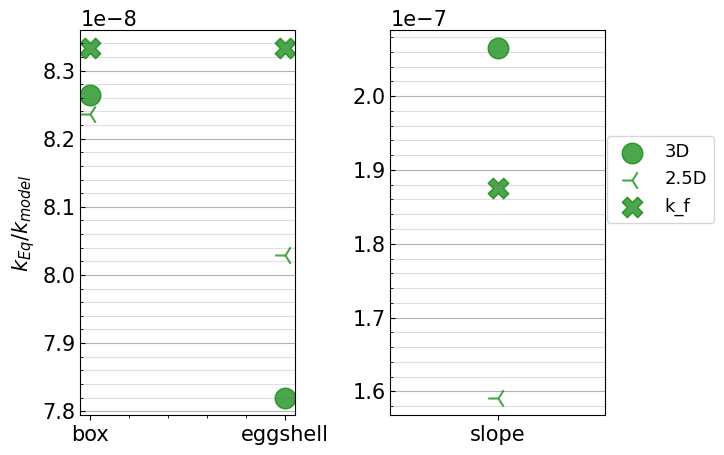

In [121]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['box','eggshell','slope']
markers = ['o','3','X']
fig, (ax1,ax2) = plt.subplots(1,2)
for i in range(len(summary_df)):
    ax1.scatter(labels[:2], summary_df.iloc[i,1:3].values, s = 220, c="g", alpha=0.7, marker=markers[i],label=summary_df.iloc[i,0])
    ax2.scatter(labels[2], summary_df.iloc[i,3], s = 220, c="g", alpha=0.7, marker=markers[i],label=summary_df.iloc[i,0])

#ax.set_xlabel("Device")
ax1.set_ylabel("$k_{Eq}/k_{model}$")
fig.legend(dimension,loc='center right', bbox_to_anchor=(1.15, 0.6))

# Show the major grid lines with dark grey lines
ax1.grid(visible=True, which='major', axis='y', color='#666666', linestyle='-', alpha=0.5)

# Show the minor grid lines with very faint and almost transparent grey lines
ax1.minorticks_on()
ax1.grid(visible=True, which='minor', axis='y', color='#606060', linestyle='-', alpha=0.2)
#ax.set_ylim([1,2.0])

# Show the major grid lines with dark grey lines
ax2.grid(visible=True, which='major', axis='y', color='#666666', linestyle='-', alpha=0.5)

# Show the minor grid lines with very faint and almost transparent grey lines
ax2.minorticks_on()
ax2.grid(visible=True, which='minor', axis='y', color='#606060', linestyle='-', alpha=0.2)

plt.style.use('default')
fig.patch.set_facecolor('xkcd:white')

plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13
#plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
'''
data = summaryM.loc[1:,'M1.1':'M4'].values
# Pop the headers from the data array
column_headers = labels
row_headers = ['Values']

# Table data needs to be non-numeric text. Format the data
# while I'm at it.

cell_text = []
for row in data:
    cell_text.append([f'{x:1.2f}' for x in row])

#ax = plt.gca()
ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
#plt.box(on=None)
# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      colLabels=column_headers,
                      loc='bottom')
the_table.scale(1, 2)
'''
# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)
fig.tight_layout()
#plt.savefig("comparisontable.png")